Характеристики grayscale: (con, lun)
(213.3043586866256, 0.32671795124328445)
Характеристики контрастного изображения: (con, lun)
(153.20326538657048, 0.37580210952041715)


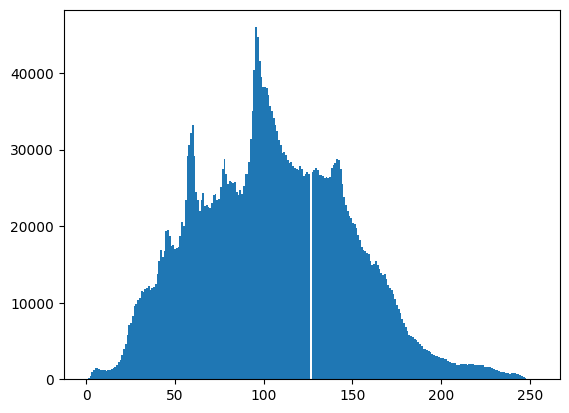

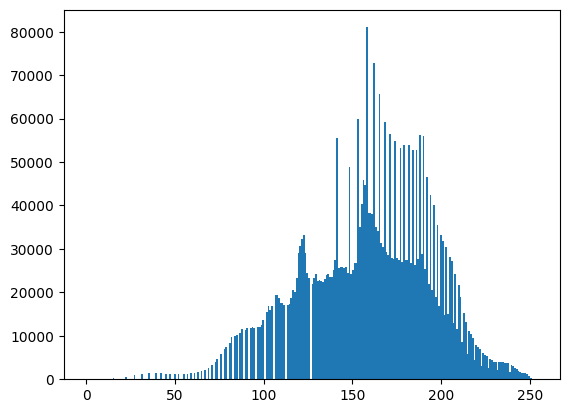

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

folder_img = "picsR/"

def semitone(img):
    if str(img.mode) == "L":
        return img

    width = img.size[0]
    height = img.size[1]
    new_image = Image.new("L", (width, height))

    for x in range(width):
        for y in range(height):
            pix = img.getpixel((x, y))
            sum_ = 0.3 * pix[0] + 0.59 * pix[1] + 0.11 * pix[2]
            new_image.putpixel((x, y), int(sum_))
    return new_image


def haralic(img):
    side = 256

    img_matrix = np.asarray(img).transpose()
    width = img.size[0]
    height = img.size[1]
    matrix = np.zeros((side, side))
    for x in range(2, width - 2):
        for y in range(2, height - 2):
            pix = img_matrix[x, y]
            up_pix = img_matrix[x, y - 2]
            down_pix = img_matrix[x, y + 2]
            left_pix = img_matrix[x - 2, y]
            right_pix = img_matrix[x + 2, y]
            matrix[pix, up_pix] += 1
            matrix[pix, down_pix] += 1
            matrix[pix, left_pix] += 1
            matrix[pix, right_pix] += 1

    return Image.fromarray(matrix), matrix


def features(matrix):
    width = matrix.shape[0]
    height = matrix.shape[1]

    con = 0
    for i in range(0, height):
        for j in range(0, width):
            con += (i - j) * (i - j) * matrix[i, j]

    lun = 0
    for i in range(0, height):
        for j in range(0, width):
            lun += matrix[i, j] / (1 + (i - j) * (i - j))

    return con, lun


def make_contrast(img, gamma=0.5, c=1, f_zero=0):
    result_matrix = np.asarray(img) / 255
    result_matrix = c * pow(result_matrix + f_zero, gamma)
    result_matrix = (result_matrix * 255).astype(np.uint8)

    result = Image.fromarray(result_matrix)
    return result, result_matrix

def make_hist(matrix, save_path):
    sh = np.reshape(matrix, (1, -1))
    plt.figure()
    plt.hist(sh[0], bins=256)
    plt.savefig(save_path)

def features_and_contrast(img_path):
  name = img_path.split('.')[0]


  img = Image.open(img_path).convert('RGB')
  img_gray = semitone(img)
  img_gray.save( folder_img + name + "_gray.png")
  img_contrast, matrix_contrast = make_contrast(img_gray)
  img_contrast.save(folder_img + name + "_contrast.png")

  img_haralic_gray, matrix_haralic_gray = haralic(img_gray)
  img_haralic_gray = img_haralic_gray.convert("L")
  img_haralic_gray.save(folder_img + name + "_H_gray.png")
  img_haralic_contrast, matrix_haralic_contrast = haralic(img_contrast)
  img_haralic_contrast = img_haralic_contrast.convert("L")
  img_haralic_contrast.save(folder_img + name + "_H_contrast.png")

  make_hist(np.asarray(img_gray), folder_img + name + "_gray_hist.png")
  make_hist(np.asarray(img_contrast), folder_img + name + "_contrast_hist.png")


  gray_features = features(matrix_haralic_gray / np.sum(matrix_haralic_gray))
  print("Характеристики grayscale: (con, lun)")
  print(gray_features)
  contrast_features = features(matrix_haralic_contrast / np.sum(matrix_haralic_contrast))
  print("Характеристики контрастного изображения: (con, lun)")
  print(contrast_features)

features_and_contrast('dog.png')